<a href="https://colab.research.google.com/github/Satya-Prakash009/EDA-playstore-project/blob/main/EDA_Project_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>
 
## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>
 
## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

1. Google Play Store apps and reviews
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
 
path = '/content/drive/MyDrive/Colab Notebooks/Data for class/PlayStoreData.csv'
play_df = pd.read_csv(path)
play_df.info()

In [ ]:
play_df.head()

In [ ]:
play_df.tail()

In [ ]:
play_df.describe()

**2. Data cleaning**

**Data Preparation and Cleaning**
Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and the combining of data sets to enrich data.

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.

In [3]:
# removing unwanted columns which are not of much use
play_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

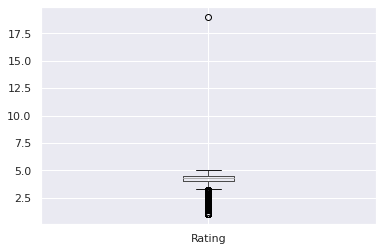

In [4]:
#boxplot to see if any outliers
play_df.boxplot()


In [5]:
# checking for rating more than 5
play_df[play_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [6]:
#removing the row
play_df.drop([10472], inplace=True)

In [ ]:
# boxplot to check if rating column ok
play_df.boxplot()

In [ ]:
#finding sum of missing values in dataset
play_df.isnull().sum()

In [9]:
# if rating column has Nan values, it is replaced by median value
play_df['Rating'].fillna(value=play_df['Rating'].median(), inplace=True)

In [ ]:
# checking for any more Null values
play_df.isnull().sum()

In [ ]:
# checking for Null value in type column
play_df[play_df['Type'].isnull()]

In [12]:
#removing the row
play_df.drop([9148], inplace=True)

In [ ]:
# checking for any more Null values
play_df.isnull().sum()

In [ ]:
# converting columns to integer

In [ ]:
# convert all size in MB
play_df['Size'] = play_df.Size.apply(lambda x: x.replace('k', 'e+3'))
play_df[10050:10060]

In [ ]:
# REMOVE ALL SPECIAL CHARACTERS 
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        play_df[col] = play_df[col].str.replace(char,"")
    # Convert col to numeric
    play_df[col] = pd.to_numeric(play_df[col])

play_df.head(10)

**DATA VISULIZATION**
We visualise data to find 

In [ ]:
grp = play_df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.mean)
z = grp['Reviews'].agg(np.mean)